<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/6_1_3_Exploratory_database_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory database analysis**
---
Made by: Diana Prado and Karen Pelcastre

Contact: pradodiana93@gmail.com

**Last Update:** March 2025


The exercises in this tutorial are focused on analyzing and showing in a graphic way, through visual representations, physicochemical properties and descriptors of pharmaceutical importance.


#Content
---

>[Exploratory database analysis](#scrollTo=fnfYqArdo7Oq)

>[Content](#scrollTo=dXSv892j6HVA)

>[Objectives](#scrollTo=-zpPIuQxcQ9S)

>[1. Preparation of the environment](#scrollTo=ENs3LULvU_m6)

>[2. One-variable plots](#scrollTo=ecZE6lgLiQGD)

>>[2.1 Calculation of descriptors](#scrollTo=yjiDRi3LLGl3)

>>[2.2 Histograms](#scrollTo=yjtrBiDmUbY6)

>>[2.3 Boxplots](#scrollTo=Qlkqkyku465A)

>>>[Packages and functions](#scrollTo=eGIEgrxNeKSG)

>>[2.4 Violin plots](#scrollTo=mkTuSn5MlgET)

>[3. Correlation analysis](#scrollTo=nKKjp5gSB2yb)

>>[3.1 Pair Plot](#scrollTo=mPYCDngtCHYB)

>>[3.2 Pearson correlation coefficient](#scrollTo=hqn5Tqnq5fH5)

>>[3.3 Heat map](#scrollTo=yLeSManpCCqN)

>[4. Scaffolds analysis](#scrollTo=dl9DBXobiEYa)

>[5. Concatenate databases](#scrollTo=XBdjyn95Ia_-)

>>[5.1 Quantitative Estimate of Drug-Likeness](#scrollTo=D1E7aDqYcRK1)

>>[5.2 Synthetic Accessibility Score](#scrollTo=WdfXqDyCcoL7)

>[For more information:](#scrollTo=Bt61ne386waM)



# Objectives
---
* Get introduced to the visualization and analysis of chemical information
* Use visual methods to analyze physicochemical properties of pharmaceutical importance and descriptors associated with molecular complexity.
* Identify possible correlations between variables


For the following exercises we will use a database downloaded from [ChEMBL](https://www.ebi.ac.uk/chembl/) that has information about drugs in phase 4 (approved and commercialized) with 1677 molecules. The database has columns that inform us about the ID of each compound in ChEMBL, name, SMILES, type of molecule, phase, and if it is of oral, parenteral or topic administration, the year when it was approved as a drug and its therapeutic indication.

The descriptors that we will calculate are the following:

>  1 - Octanol-water partition coefficient (logP) <br>
   2 - Topological polar surface area (TPSA) <br>
   3 - Molecular weight (MW) <br>
   4 - Number of rotatable bonds (RotBonds) <br>
   5 - Number of hydrogen bond donor atoms  (HBD) <br>
   6 - Number of hydrogen bond acceptor atoms (HBA)<br>
   7 - Number of heteroatoms (HetAtoms)<br>
   8 - Number of rings (NumRings)<br>
   9 - Fraction of sp<sup>3</sup> carbon atoms  (CSP3)  <br>

In the first part of this tutorial, we will plot different types of representations to get visual information about our variables (in this case, descriptors of pharmaceutical importance). Also, we will analyze the possible correlations between the different descriptors.


#*1. Preparation of the environment*
___

Install libraries:

In [ ]:
!pip install rdkit # Chemoinformatic
#pip install pandas==1.5.3

Import libraries and modules:

In [ ]:
# Data and plots management
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemoinformatic
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) # Visualize molecules

Access the database:

We will open a .xlsx file with the `pandas` library and we will work with the *dataframe* named "df"


In [ ]:
# Read file
df=pd.read_excel("https://github.com/DIFACQUIM/Cursos/raw/refs/heads/main/Datasets/chembl_fases_curada.xlsx", engine='openpyxl')

print(f"DataFrame shape: {df.shape}.")
df

DataFrame shape: (1677, 11).


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1
2,CHEMBL4,OFLOXACIN,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,Small molecule,4,True,True,True,1990,Antibacterial,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
3,CHEMBL5,NALIDIXIC ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,Small molecule,4,True,False,False,1964,Antibacterial,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
4,CHEMBL6,INDOMETHACIN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Small molecule,4,True,True,True,1965,Anti-Inflammatory,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...
1672,CHEMBL4594250,NETARSUDIL,Cc1ccc(C(=O)OCc2ccc([C@@H](CN)C(=O)Nc3ccc4cncc...,Small molecule,4,False,False,True,2017,NaN,Cc1ccc(C(=O)OCc2ccc(C(CN)C(=O)Nc3ccc4cnccc4c3)...
1673,CHEMBL4594261,FLUOROESTRADIOL F-18,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,Small molecule,4,False,True,False,2020,NaN,CC12CCC3c4ccc(O)cc4CCC3C1CC([18F])C2O
1674,CHEMBL4594271,BEROTRALSTAT,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...,Small molecule,4,True,False,False,2020,NaN,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...
1675,CHEMBL4596392,DEUCRAVACITINIB,CNC(=O)c1nnc(NC(=O)C2CC2)cc1Nc1cccc(-c2ncn(C)n...,Small molecule,4,True,False,False,2022,NaN,CNC(=O)c1n[nH]c(=NC(=O)C2CC2)cc1Nc1cccc(-c2ncn...


In [ ]:
#Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  1677 non-null   object
 1   pref_name           1677 non-null   object
 2   canonical_smiles    1677 non-null   object
 3   molecule_type       1677 non-null   object
 4   max_phase           1677 non-null   int64 
 5   oral                1677 non-null   bool  
 6   parenteral          1677 non-null   bool  
 7   topical             1677 non-null   bool  
 8   first_approval      1677 non-null   int64 
 9   indication_class    1067 non-null   object
 10  NEW_SMILES          1677 non-null   object
dtypes: bool(3), int64(2), object(6)
memory usage: 109.9+ KB


In [ ]:
#Basic statistics about the data
df.describe()

,max_phase,first_approval
count,1677.0,1677.000000
mean,4.0,1989.421586
std,0.0,20.756040
min,4.0,1939.000000
25%,4.0,1976.000000
50%,4.0,1991.000000
75%,4.0,2007.000000
max,4.0,2022.000000


# *2. One-variable plots*
---

## 2.1 Calculation of descriptors

We will calculate different physicochemical properties with `RDKit`:

[06:21:51] WARNING: not removing hydrogen atom without neighbors
[06:21:51] WARNING: not removing hydrogen atom without neighbors
[06:21:51] WARNING: not removing hydrogen atom without neighbors
[06:21:51] WARNING: not removing hydrogen atom without neighbors


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES,ROMol
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1,

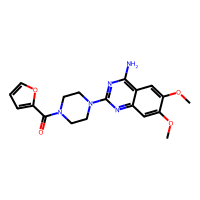
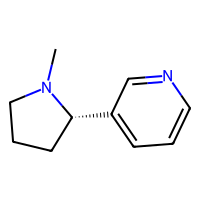

In [ ]:
#New object column Mol type
PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles")
df[0:2]

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,NEW_SMILES,ROMol,MW
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,,383.159354
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4,True,False,True,1984,Smoking Cessation Adjunct,CN1CCCC1c1cccnc1,,162.115698

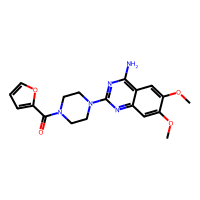
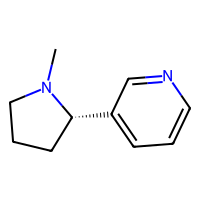

In [ ]:
#Calculate the molecular weight
df["MW"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df[0:2]

In [ ]:
#Calculate the rest of the descriptors
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"] = df["ROMol"].apply(Descriptors.NumRotatableBonds)

#Visualize selected columns
df[['MW', 'logP', 'TPSA', 'HBA']]

,MW,logP,TPSA,HBA
0,383.159354,1.78460,106.95,8
1,162.115698,1.84830,16.13,2
2,361.143784,1.54400,75.01,6
3,232.084792,1.42302,72.19,4
4,357.076786,3.92732,68.53,4
...,...,...,...,...
1672,453.205242,4.88964,94.31,5
1673,289.170743,3.55720,40.46,2
1674,562.210422,5.70188,108.76,6
1675,422.181487,1.73240,135.95,9


More information about descriptors that can be calculated with `RDKit`: <br>
https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html <br>
https://rdkit.org/docs/source/rdkit.Chem.Lipinski.html

##2.2 Histograms

A histogram is a visual representation in bar graph form, which symbolizes the distribution of a set of data by intervals and the frequency of these intervals in a range.
Using the `.hist` method from Matplotlib, we see the histogram of the number of rotatable bonds of
parenteral administrated drugs.

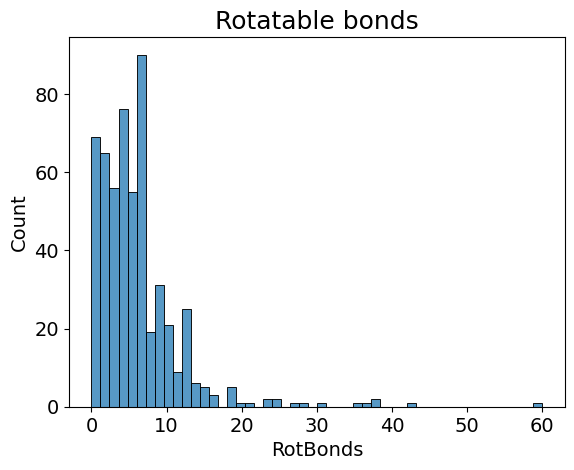

In [ ]:
#Save a new DataFrame with the parenteral drugs
df_parenteral = df[df['parenteral']== 1]
#Plot the histogram with Seaborn
hist=sns.histplot(x="RotBonds", data = df_parenteral)
#Tittle, axis tittle and font size
hist.axes.set_title("Rotatable bonds",fontsize=18)
hist.set_xlabel("RotBonds",fontsize=14)
hist.set_ylabel("Count",fontsize=14)
hist.tick_params(labelsize=14)
#Save image
plt.savefig("RotBonds_parenteral.png")

It is possible to analyze all the variables in one plot. In this case we show the distribution of the values for the different descriptors of the database of parenteral administered drugs.

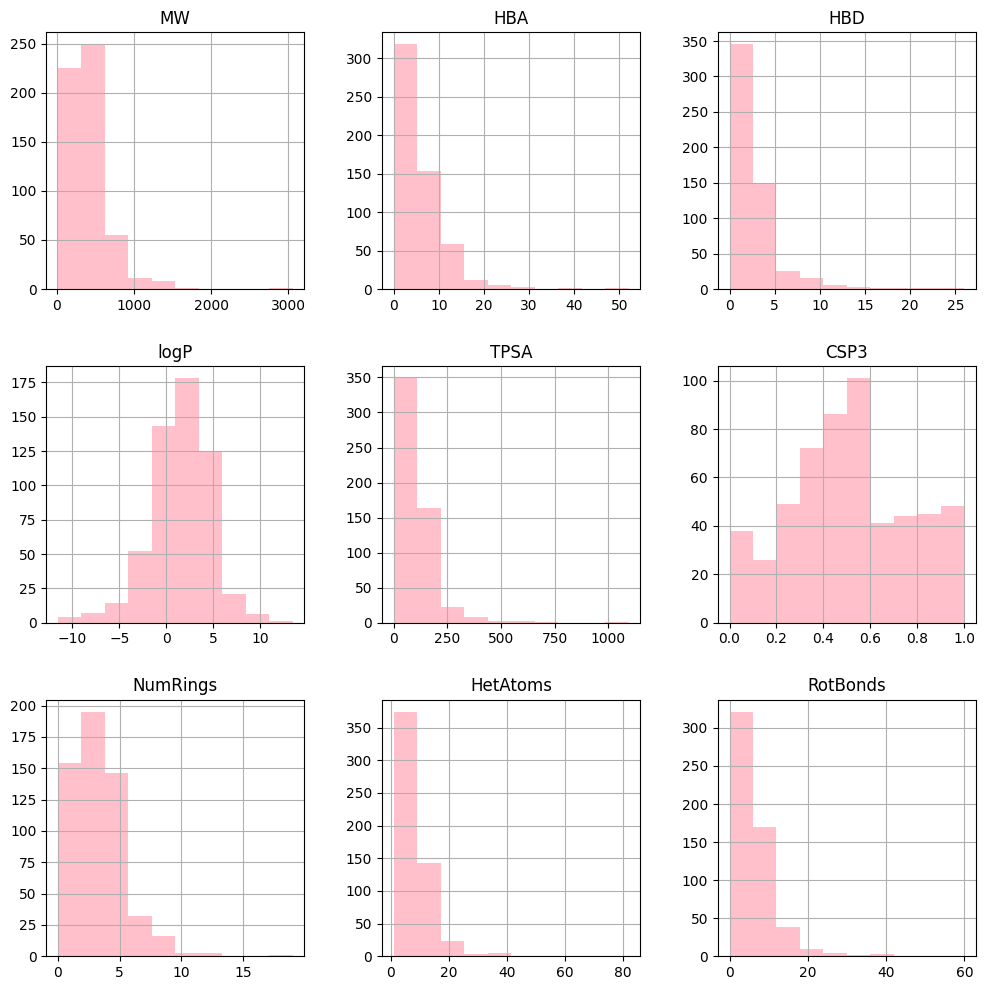

In [ ]:
#Select descriptors
df_parenteral_descriptors= df_parenteral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Histogram
df_parenteral_descriptors.hist(figsize=(12,12), color="pink")
plt.show()

##2.3 Boxplots
A boxplot is a simple unidimensional graph that shows all the values of a variable of the database. It specifies the maximum and minimum values in the borders, and the first, second, and third quartiles in the interior of the box. The boxplots show the distribution of the data, with help of the box and the medium it is possible to see if it is symmetrical, biased to the left or right, indicating where the data is mostly focused. It also allows us to identify outliers and compare distributions (See **Figure 1**).




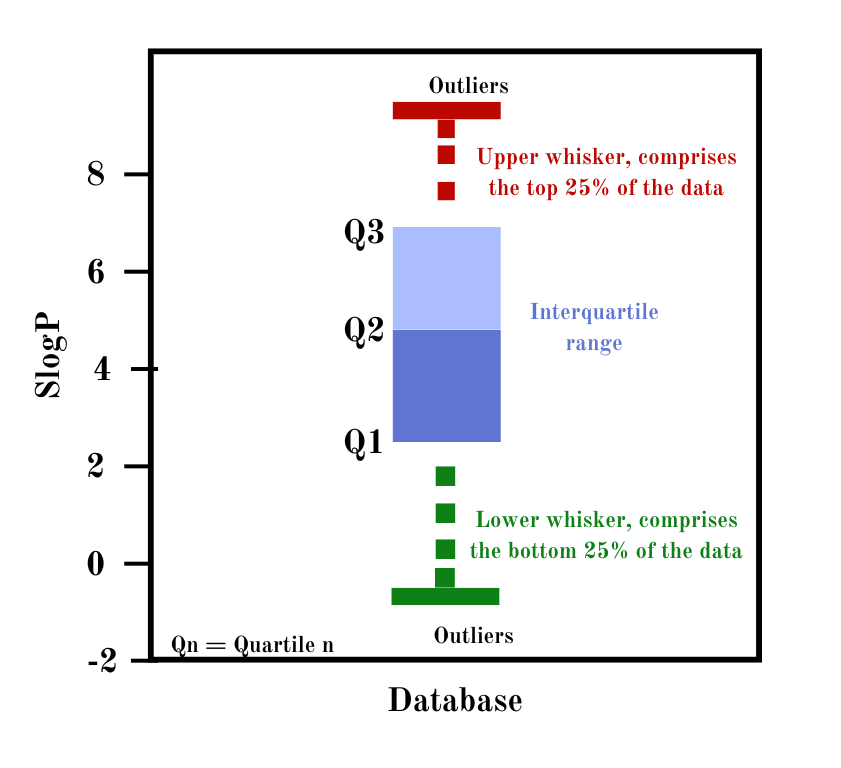

**Figure 1.** Elements of a boxplot

You can generate the graphic representation of a boxplot from the  `Seaborn`package, that was installed at the beginning.

To plot data according to its route of administration a new column called "Route_adm" will be created:

In [ ]:
#Conditions to assign the route of administration to each compound
conditions = [
    (df['oral'] == 1),
    (df['parenteral'] == 1),
    (df['topical'] == 1),
    (df['oral'] == 0) & (df['parenteral'] == 0) & (df['topical'] == 0)]
#Name that will be assigned to each compound according to its route of administration
values = ['Oral', 'Parenteral', 'Topical', 'Other']
#Create a new column and visualize the dataframe
df['Route_adm'] = np.select(conditions, values, default='Other')
df[53:59]

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,...,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,Route_adm
53,CHEMBL434,ISOPROTERENOL,CC(C)NCC(O)c1ccc(O)c(O)c1,Small molecule,4,False,True,True,1956,Bronchodilator,...,211.120843,4,4,1.12920,72.72,0.454545,1,4,4,Parenteral
54,CHEMBL435,HYDROCHLOROTHIAZIDE,NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O,Small molecule,4,True,False,False,1959,Diuretic,...,296.964475,5,3,-0.35130,118.36,0.142857,2,10,1,Oral
55,CHEMBL35,FUROSEMIDE,NS(=O)(=O)c1cc(C(=O)O)c(NCc2ccco2)cc1Cl,Small molecule,4,True,True,False,1966,Diuretic,...,330.007720,5,3,1.89070,122.63,0.083333,2,9,5,Oral
56,CHEMBL36,PYRIMETHAMINE,CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1,Small molecule,4,True,False,False,1953,Antimalarial,...,248.082874,4,2,2.52380,77.82,0.166667,2,5,2,Oral
57,CHEMBL437,SULFATHIAZOLE,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,Small molecule,4,False,False,True,1945,Antibacterial,...,255.013619,5,2,1.52610,85.08,0.000000,2,7,3,Topical
58,CHEMBL438,SULFAMERAZINE,Cc1ccnc(NS(=O)(=O)c2ccc(N)cc2)n1,Small molecule,4,True,False,False,1982,Antibacterial,...,264.068097,5,2,1.16802,97.97,0.090909,2,7,3,Oral


<ipython-input-123-c890521bdb99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Route_adm", y="MW", data=df, palette="GnBu")


Text(0, 0.5, 'Molecular Weight')

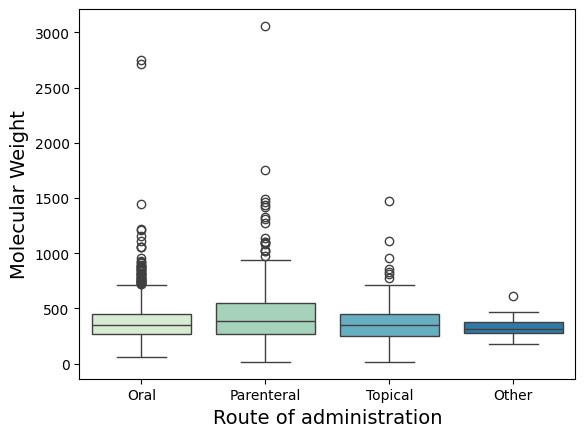

In [ ]:
#Plot the boxplot or the MW of each route of administration
ax = sns.boxplot(x="Route_adm", y="MW", data=df, palette="GnBu")
#Axis titles
plt.xlabel('Route of administration', size=14)
plt.ylabel('Molecular Weight', size=14)

<ipython-input-124-3e9b9aa9ad69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Route_adm", y="MW", data=df, palette="GnBu", showfliers=False)


Text(0, 0.5, 'Molecular Weight')

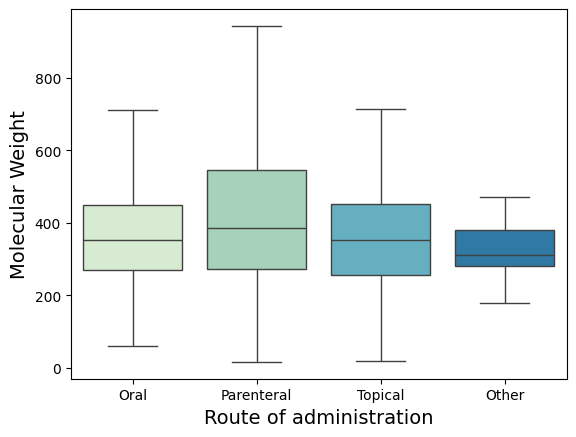

In [ ]:
#Plot boxplot without outliers
ax = sns.boxplot(x="Route_adm", y="MW", data=df, palette="GnBu", showfliers=False)
plt.xlabel('Route of administration', size=14)
plt.ylabel('Molecular Weight', size=14)

More color `seaborn` palettes: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

Let's see joint *boxplots* for all the variables:

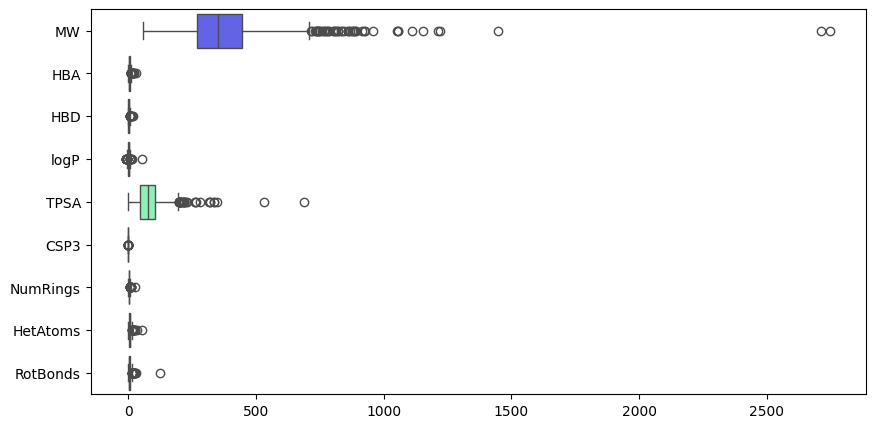

In [ ]:
#Select only the columns with descriptors for oral administrated drugs
df_oral = df[df['oral']== 1]
df_oral_descriptors= df_oral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
#Specify the size of the figure with Matplotlib
plt.gcf().set_size_inches(10, 5)
plt.show()

As we can see, the values of the variables are on different scales. To visualize it better, we apply the following logarithmic scale:


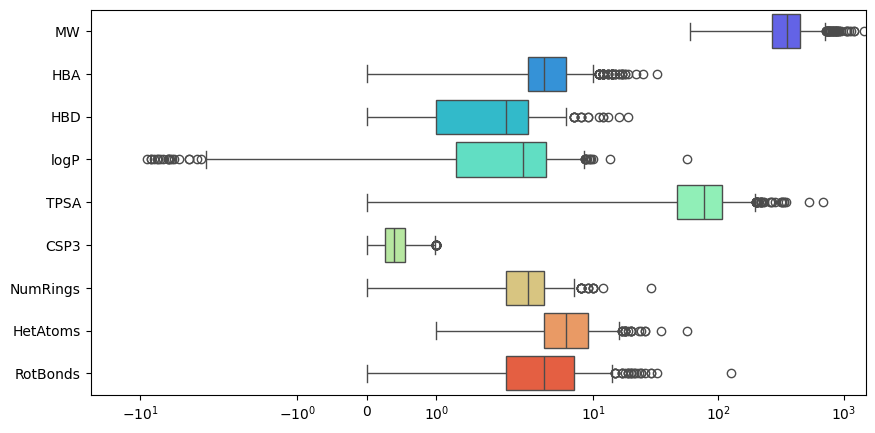

In [ ]:
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
# X axis in logarithmic scale
ax.set_xscale('symlog')
#Specify limits for X axis
ax.axis(xmin=-25, xmax=1500)
#Size of the figure
plt.gcf().set_size_inches(10, 5)

As we can see, the median of the data varies a lot. This happens because the data are on different scales, which means that it uses different units to measure the different characteristics. To **normalize or scale the data**, there are multiple procedures  (see in [*Scaling of Data*](http://www.statistics4u.com/fundstat_eng/cc_scaling.html)). A common method is to standardize the variables by subtracting the column mean and dividing it by the variance by doing this we have new values inside each column for which $\mu=0$ and $\sigma=1$ . `Scikit-learn` has a module called "preprocessing", that we will use below. For more information, visit the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')


For the normalization process, it is necessary to delete string type columns.

In [ ]:
#Verify that the variables are numbers
df_oral_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1103 entries, 0 to 1676
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MW        1103 non-null   float64
 1   HBA       1103 non-null   int64  
 2   HBD       1103 non-null   int64  
 3   logP      1103 non-null   float64
 4   TPSA      1103 non-null   float64
 5   CSP3      1103 non-null   float64
 6   NumRings  1103 non-null   int64  
 7   HetAtoms  1103 non-null   int64  
 8   RotBonds  1103 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 86.2 KB


### Packages and functions

`Standard scaler`: Removes the median and scales each characteristic/variable to the variance of the unit, it is done per characteristic independently.
For more information: [*Standar scaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

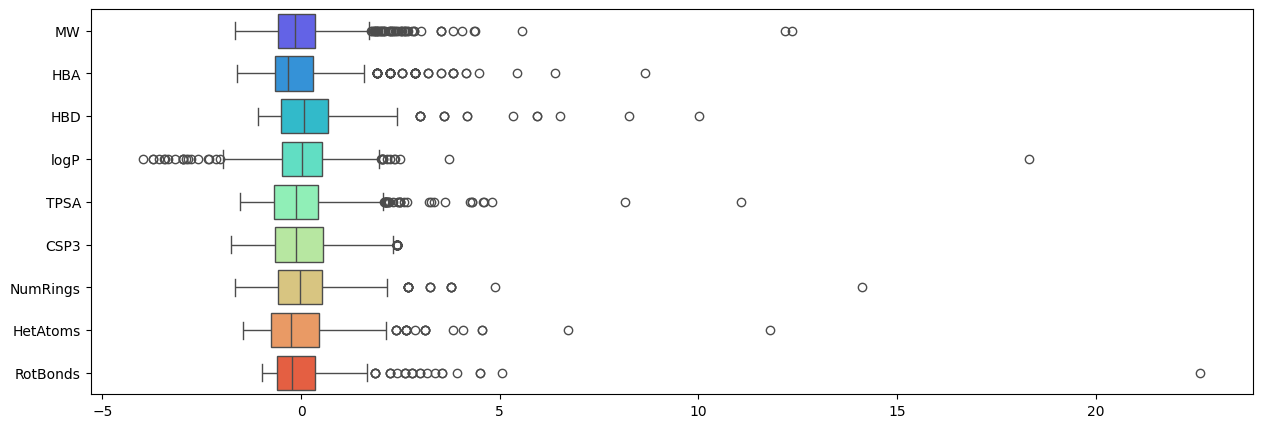

In [ ]:
#Import the StandardScaler function from ScikitLearn
from sklearn.preprocessing import StandardScaler

#Make a new object with normalized data
scaled = StandardScaler().fit_transform(df_oral_descriptors)  #fit.transform() adjusts the new values to the data and
                                                              #stores them replacing the previous values

#Create a new normalized dataframe called "df_scaled"
df_scaled = pd.DataFrame(data=scaled, columns=df_oral_descriptors.columns)

#Plot boxplots of the variables using Seaborn
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Size of the figure
plt.gcf().set_size_inches(15, 5)

Boxplots documentation with `seaborn`: https://seaborn.pydata.org/generated/seaborn.boxplot.html

##2.4 Violin plots
A violin plot just like a boxplot shows the distribution of the data and outliers. However, the violin plot also shows the estimated density of the data in each point. The wide of the violin represents the density of the data in that place, while the form of the violin represents distribution of the data (**Figure 2**).

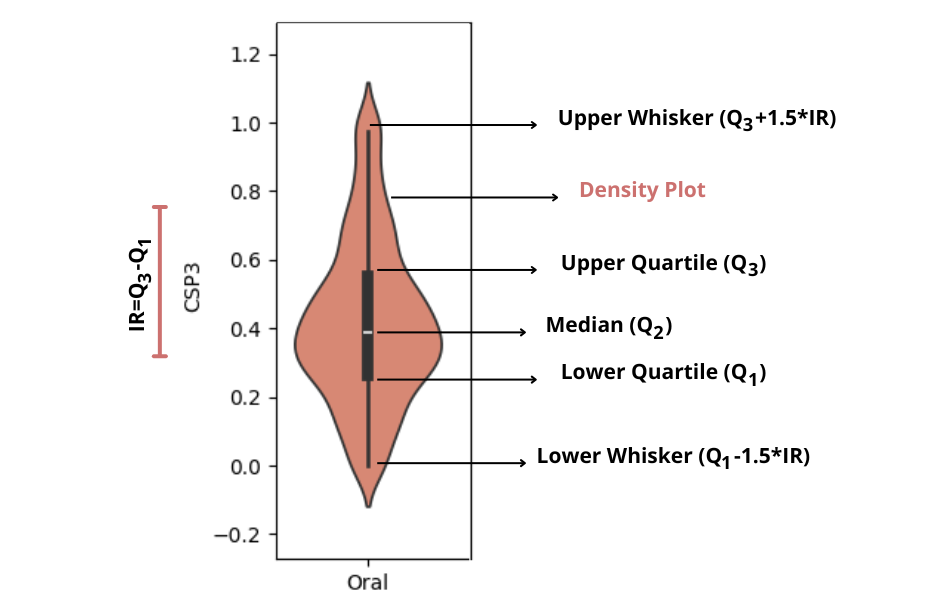

**Figure 2.** Elements of a violinplot.

<ipython-input-129-7931b649d6e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="TPSA", data=df_oral_descriptors, palette="BuPu")


<Axes: ylabel='TPSA'>

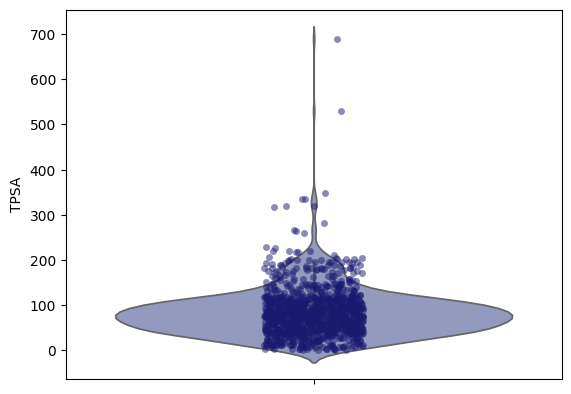

In [ ]:
#Plot violinplot with TPSA of oral administered drugs
sns.violinplot(y="TPSA", data=df_oral_descriptors, palette="BuPu")
#Add points for each data
sns.stripplot(y="TPSA", data=df_oral_descriptors, color='midnightblue', alpha=0.5)

<ipython-input-130-639772463892>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Route_adm", y="CSP3", data=df, palette="flare")


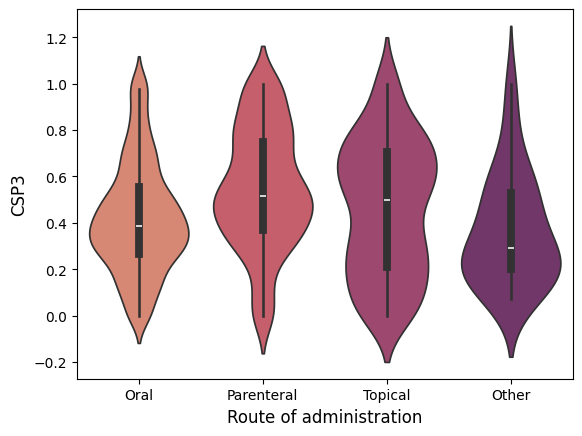

In [ ]:
#Violinplot of the fraction of sp3 carbons by route of administration
sns.violinplot(x="Route_adm", y="CSP3", data=df, palette="flare")
# Label axis
plt.xlabel('Route of administration', size=12)
plt.ylabel('CSP3', size=12)
plt.savefig('violinplot_CSP3_Route_adm.png')

We can also use violinplots to compare two descriptors with each other and visualize a possible correlation between them. For example, when plotting the number of rings vs. the MW we can see that when one increases the other one increases as well (directly proportional).

<ipython-input-131-e7004cba37da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x = 'NumRings', y = 'MW', data = df_oral_descriptors, palette="rainbow")


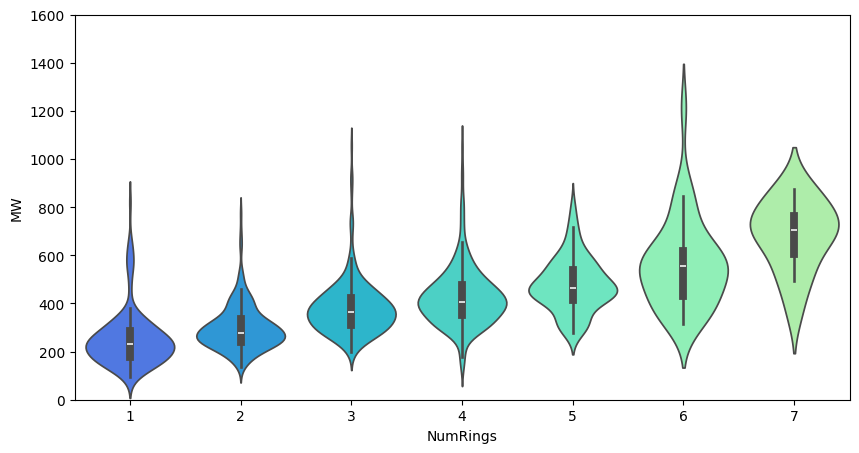

In [ ]:
#Violinplot of the number of rings vs. MW of oral administered drugs
ax = sns.violinplot(x = 'NumRings', y = 'MW', data = df_oral_descriptors, palette="rainbow")
#Establish limits for both axis
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 1600)
#Size of the plot
plt.gcf().set_size_inches(10, 5)

Violinplots documentation with `seaborn`: https://seaborn.pydata.org/generated/seaborn.violinplot.html

#*3. Correlation analysis*
---

Another important aspect for understanding our data is studying the correlation between the variables. If we want to visualize the correlation between logP and TPSA, we can make a scatter plot with marginal histograms usign "`sns.jointplot`"


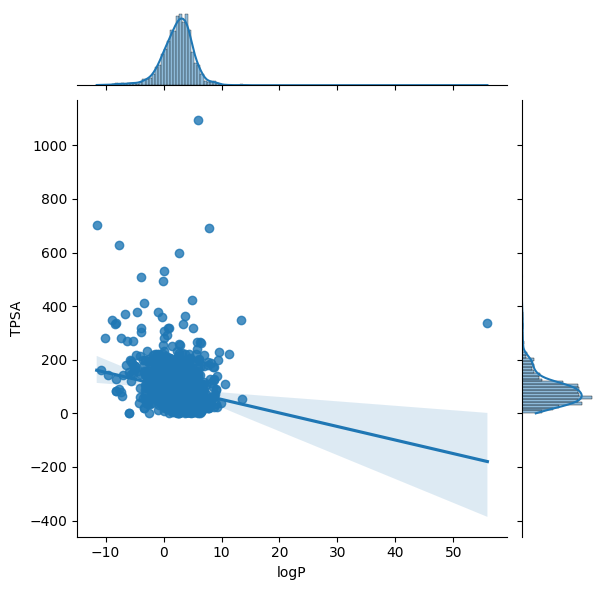

In [ ]:
joint_plt = sns.jointplot(x='logP', y='TPSA', data=df, kind='reg')

We can see that the slope is not very steep, we infer that the relation is not linear, and it has a low correlation.

##3.1 Pair Plot

Another way of visualizing the correlation between variables is by doing a correlation matrix with the `pairplot` function from Seaborn. For example, here we do a correlation of the six columns from the dataset: "logP", "TPSA", "MW", "RotBonds", "HBD" and "HBA".


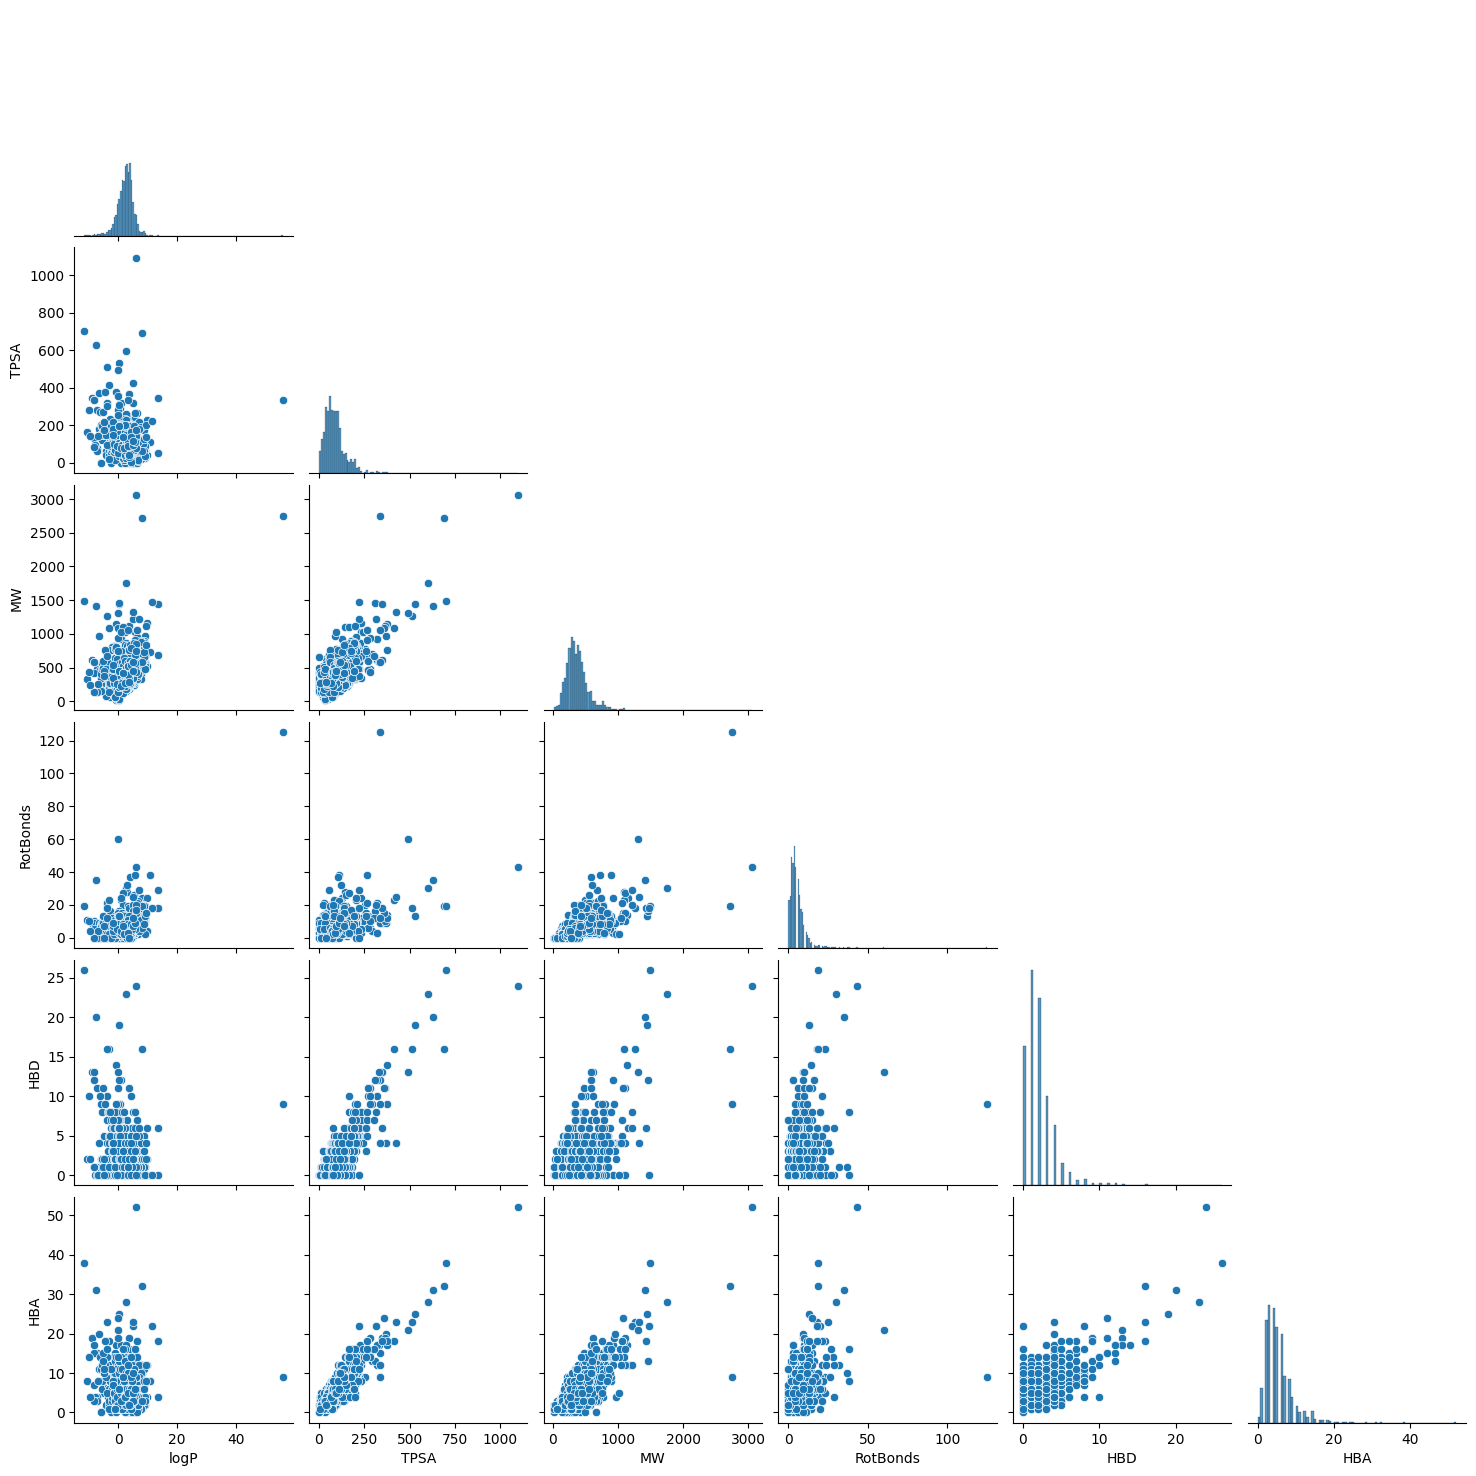

In [ ]:
sns.pairplot(df[["logP", "TPSA", "MW", "RotBonds", "HBD", "HBA"]], corner="true")
#corner=True ignores the representarion of the superior half of the matrix

##3.2 Pearson correlation coefficient
We can calculate the correlation between two variables with the *Pearson* correlation coefficient and the *p value*.

The Pearson correlation coefficient (r) allows us to visualize the  linear dependencies between two sets of data.
* A value of **+1** means the linear correlation is total positive

* **0** means there's no linear correlation, and

* **-1**,  means the linear correlation is total negative

Positive correlations imply that as x increases, y does as well. While negative correlations imply that as x increases, y decreases.

The p value states the probability that the data is not correlated.  

The *p value* indicates the probability that the uncorrelated datasets have a Pearson correlation coefficient at least as extreme as the determined for those datasets. If this probability is lower than 5% (P<0.05), it means that the correlation coefficient is statistically significant.

**It is important to consider that the correlation does not imply casualty. Two variables can be highly correlated but not necessarily be casually related.**



In [ ]:
#Import the PearsonR function from the "stats" module from SciPy
from scipy.stats import pearsonr


In [ ]:
#Define a function to obtain the correlation between two variables
def get_corr(col1, col2, temp_df):

    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])

    print("The correlation between {} and {} is {:.2f}".format(col1, col2, pearson_corr))
    print("The p value of this correlation is {:.^e}".format(p_value))

#Use the function to obtain the correlation between TPSA and logP
get_corr('TPSA', 'logP', df)

The correlation between TPSA and logP is -0.21
The p value of this correlation is 8.820805e-19


There’s a negative correlation between logP and TPSA (r=-0.21), being significant by getting a p value lower than 5%. It also means that as *x* increases, *y* decreases. However, the correlation is not high as it is not close to -1.

##3.3 Heat map

Heat maps are graphic representations that allow us to see the correlation between variables (descriptors) avoiding noise and redundant information.

We can create a DataFrame with the Pearson correlation coefficient for each pair of columns (using the
 `df.corr()` function) and then, use `Matplotlib` and `Seaborn` to create a  _heat map_ of the coefficients


In [ ]:
# Calculate the correlation with the Pearson coefficient
correlation = df_oral_descriptors.corr(method='pearson')
# Create a new figure
fig=plt.gcf()
fig.set_size_inches(9,9)

<Figure size 900x900 with 0 Axes>

<Axes: >

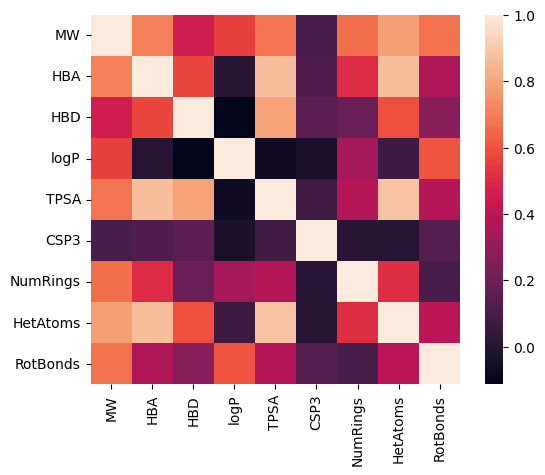

In [ ]:
# Heatmap of the correlation using Seaborn
sns.heatmap(correlation, annot=False,square=True)

When comparing multiple variables at the same time it can be hard to understand the behavior of the data. So, we can add to the heat map the coefficients and plot only the lower triangular correlation matrix (since it is a symmetrical plot, and the information of the upper triangle is redundant)


<Axes: >

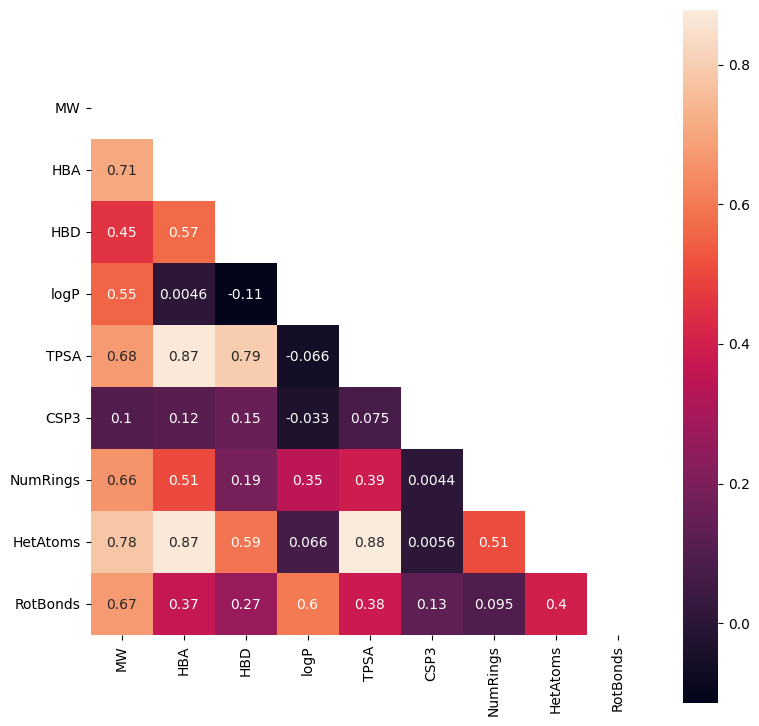

In [ ]:
#Calculate the correlation
correlation = df_oral_descriptors.corr()
# np.triu is a function that plots only the lower triangular
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(9,9)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

#*4. Scaffolds analysis*
---

In this section we will visualize the sacaffolds or frameworks fo the molecules in the database and we will calculate their frequency. Although there are several definitions, we will use the [Bemis-Murcko](https://pubs.acs.org/doi/10.1021/jm9602928) definition, which removes the side chains of the original structure keeping the rings and the linkers (**Figure 3**).

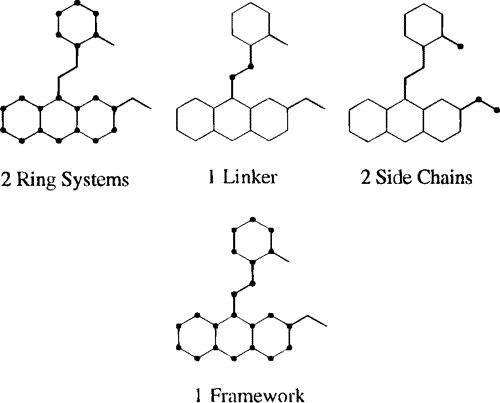

**Figure 3.** Bemis-Murcko definition

In [ ]:
#Add new column and visualize SMILES
PandasTools.AddMurckoToFrame(df, "ROMol")
df[['canonical_smiles', 'Murcko_SMILES']]

,canonical_smiles,Murcko_SMILES
0,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1
1,CN1CCC[C@H]1c1cccnc1,c1cncc([C@@H]2CCCN2)c1
2,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,O=c1ccn2c3c(c(N4CCNCC4)ccc13)OCC2
3,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,O=c1cc[nH]c2ncccc12
4,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,O=C(c1ccccc1)n1ccc2ccccc21
...,...,...
1672,Cc1ccc(C(=O)OCc2ccc([C@@H](CN)C(=O)Nc3ccc4cncc...,O=C(Cc1ccc(COC(=O)c2ccccc2)cc1)Nc1ccc2cnccc2c1
1673,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1C[C@...,c1ccc2c(c1)CC[C@@H]1[C@@H]2CCC2CCC[C@H]21
1674,N#Cc1cccc(C(NCC2CC2)c2ccc(F)c(NC(=O)c3cc(C(F)(...,O=C(Nc1cccc(C(NCC2CC2)c2ccccc2)c1)c1ccnn1-c1cc...
1675,CNC(=O)c1nnc(NC(=O)C2CC2)cc1Nc1cccc(-c2ncn(C)n...,O=C(Nc1cc(Nc2cccc(-c3nc[nH]n3)c2)cnn1)C1CC1


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class,...,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,Route_adm,Murcko_SMILES,scaffold
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4,True,False,False,1976,Antihypertensive,...,1,1.7846,106.95,0.315789,4,9,4,Oral,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1,

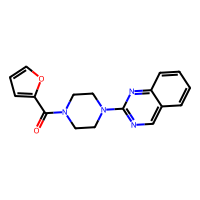

In [ ]:
#Add Mol type column with scaffolds
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')
df.head(1)

In [ ]:
#Make a copy of the dataframe
df_b= df.copy()
#Mol type columns
df_b.drop("ROMol", axis=1, inplace=True)
df_b.drop("scaffold", axis=1, inplace=True)
#Keep selected columns
df_b = df_b[['canonical_smiles','Murcko_SMILES', 'MW','HBD','HBA','TPSA','RotBonds',
             'logP', 'CSP3','HetAtoms', 'NumRings', 'Route_adm']]

In [ ]:
#Visualize dataframe
print(f"DataFrame shape: {df_b.shape}")
df_b.head(2)

DataFrame shape: (1677, 12)


,canonical_smiles,Murcko_SMILES,MW,HBD,HBA,TPSA,RotBonds,logP,CSP3,HetAtoms,NumRings,Route_adm
0,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,O=C(c1ccco1)N1CCN(c2ncc3ccccc3n2)CC1,383.159354,1,8,106.95,4,1.7846,0.315789,9,4,Oral
1,CN1CCC[C@H]1c1cccnc1,c1cncc([C@@H]2CCCN2)c1,162.115698,0,2,16.13,1,1.8483,0.500000,2,2,Oral


In [ ]:
#Merge data by scaffolds
amount = df_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))



Dataset with 1009 different entries: Murcko_SMILES
c1ccccc1                                                                                                           142
                                                                                                                   120
O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1                                                                          20
O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21                                                                            18
O=C1C=CC2C(=C1)CC[C@H]1[C@@H]3CCCC3CC[C@H]21                                                                        13
                                                                                                                  ... 
O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1                                                                              1
O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(CC2CC2)CC1.O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(CC2CC2)CC1     

In [ ]:
#New dataframe with SMILES of scaffolds and its amount, ordered from highest to lowest
df_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
df_sca_all=df_sca_all.sort_values(by='Amount', ascending= False)
df_sca_all=df_sca_all.reset_index(level=None, drop=False)
print ('All:', df_sca_all.shape, df_sca_all.columns)
df_sca_all

All: (1009, 2) Index(['Murcko_SMILES', 'Amount'], dtype='object')


,Murcko_SMILES,Amount
0,c1ccccc1,142
1,,120
2,O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1,20
3,O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21,18
4,O=C1C=CC2C(=C1)CC[C@H]1[C@@H]3CCCC3CC[C@H]21,13
...,...,...
1004,O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1,1
1005,O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(C...,1
1006,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccccc2)sc2ccc...,1
1007,O=C(c1cccc(Cc2n[nH]c(=O)c3ccccc23)c1)N1CCN(C(=...,1


In [ ]:
#If there's molecules without a scaffold, we write "Linear molecule"
df_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [ ]:
#Add frequency column, consider the total number of entries
df_sca_all.reset_index(drop=True, inplace=True)
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries:{sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']) )
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
df_sca_all

Total Frecuency in Database: 99.99999999999848, different entries:1677, different Murcko Smiles: 1009


,Murcko_SMILES,Amount,Frecuency
0,c1ccccc1,142,8.467501
1,Linear molecule,120,7.155635
2,O=C1C=C2CC[C@H]3[C@@H]4CCCC4CC[C@@H]3C2CC1,20,1.192606
3,O=C1C=CC2C(=C1)CC[C@@H]1C2CCC2CCC[C@H]21,18,1.073345
4,O=C1C=CC2C(=C1)CC[C@H]1[C@@H]3CCCC3CC[C@H]21,13,0.775194
...,...,...,...
1004,O=C(c1cc2ccccc2[nH]1)N1CCN(c2ccccn2)CC1,1,0.059630
1005,O=C(c1ccc(NS(=O)(=O)c2cccc3cccnc23)cc1)N1CCN(C...,1,0.059630
1006,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccccc2)sc2ccc...,1,0.059630
1007,O=C(c1cccc(Cc2n[nH]c(=O)c3ccccc23)c1)N1CCN(C(=...,1,0.059630


[06:22:04] SMILES Parse Error: syntax error while parsing: Linear
[06:22:04] SMILES Parse Error: check for mistakes around position 1:
[06:22:04] Linear
[06:22:04] ^
[06:22:04] SMILES Parse Error: Failed parsing SMILES 'Linear' for input: 'Linear'


,Murcko_SMILES,Amount,Frecuency,ROMol
0,c1ccccc1,142,8.467501,

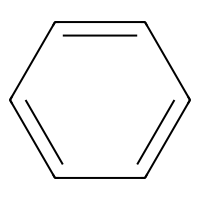

In [ ]:
#Add Mol type column with frequency of the scaffolds
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')
df_sca_all[0:1]

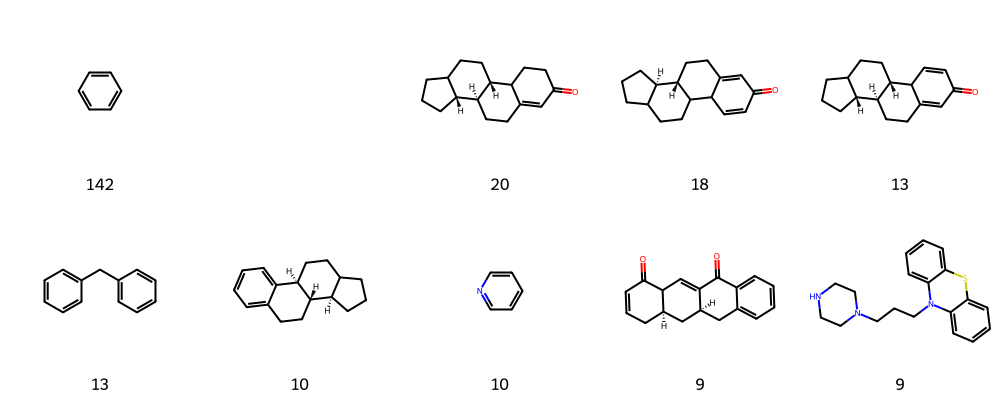

In [ ]:
#Visualize the scaffolds and its amount
PandasTools.FrameToGridImage(df_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

#*5. Concatenate databases*
---

We will open a [file.csv ](https://github.com/DIFACQUIM/Cursos/blob/main/Datasets/DNMT1_curada.csv) that will be a new DataFrame called "DNMT1".This file has data of compounds with a IC50 reported in ChEMBL:

In [ ]:
#Read file
DNMT1=pd.read_csv("https://github.com/DIFACQUIM/Cursos/raw/refs/heads/main/Datasets/DNMT1_curada.csv", delimiter=',')
#Obtain information about rows and columns
print(f"DataFrame shape: {DNMT1.shape}.")
DNMT1.head(1)

DataFrame shape: (391, 3).


,ID,SMILES,Data set
0,"""CHEMBL2336409",Cc1cc(=Nc2ccc(NC(=O)c3ccc(N=c4cc[nH]c5ccccc45)...,DNMT1


Print columns and unified names:



In [ ]:
#See columns
print(df.columns)
print(DNMT1.columns)

Index(['molecule_chembl_id', 'pref_name', 'canonical_smiles', 'molecule_type',
       'max_phase', 'oral', 'parenteral', 'topical', 'first_approval',
       'indication_class', 'NEW_SMILES', 'ROMol', 'MW', 'HBA', 'HBD', 'logP',
       'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds', 'Route_adm',
       'Murcko_SMILES', 'scaffold'],
      dtype='object')
Index(['ID', 'SMILES', 'Data set'], dtype='object')


In [ ]:
#New column to specify the database
df['DATASET'] = 'CHEMBL'

In [ ]:
# Select columns
df = df[['molecule_chembl_id', 'NEW_SMILES', 'DATASET']]
DNMT1 = DNMT1[['ID', 'SMILES', 'Data set']]

# Change the name to columns
df.columns = ["ID", "SMILES", "DATABASE_NAME"]
DNMT1.columns = ["ID", "SMILES", "DATABASE_NAME"]

# Concatenate databases
DATA = pd.concat([df, DNMT1], axis=0).reset_index(drop=True)
DATA.head()

,ID,SMILES,DATABASE_NAME
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL
3,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,CHEMBL
4,CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,CHEMBL


## 5.1 Quantitative Estimate of Drug-Likeness

The QED is a measure to estimate the drug-likeness qualities of a compound. It is based on eight properties with pharmaceutical importance: molecular weight, octanol-water partition coefficient, topological polar surface area (TPSA), number of rotatable bonds, number of hydrogen bond acceptor atoms, number of hydrogen bond donor atoms, aromatic rings and number of alerts by functional groups. The cut-off point is QED > 0.67.

Reference: https://doi.org/10.1038/nchem.1243

In [ ]:
#Add Mol type column to the complete database
PandasTools.AddMoleculeColumnToFrame(DATA,'SMILES','Molecule',includeFingerprints=True)
print([str(x) for x in  DATA.columns])

[06:22:05] Explicit valence for atom # 3 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 6 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 11 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 5 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 3 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 21 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 1 P, 7, is greater than permitted
[06:22:05] Explicit valence for atom # 1 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 11 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 8 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 1 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 26 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 1 P, 7, is greater than permitted
[06:22:06] Explicit valence for atom # 21 P, 7,

['ID', 'SMILES', 'DATABASE_NAME', 'Molecule']


,ID,SMILES,DATABASE_NAME,Molecule
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,

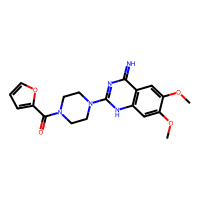
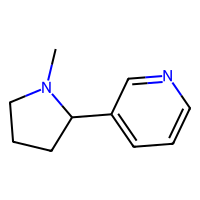
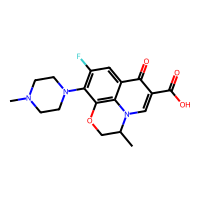

In [ ]:
#Visualize dataframe
DATA.head(3)

,ID,SMILES,DATABASE_NAME,Molecule,QED
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,,0.708798
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,,0.626152
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,,0.874740

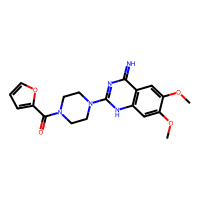
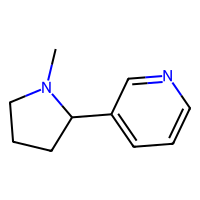
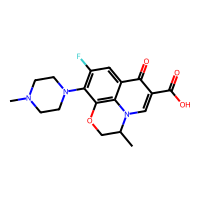

In [ ]:
#Calculate the QED
QEDlist = []

for mol in DATA['Molecule']:
    if mol is not None and isinstance(mol, Chem.Mol):
        qed_value = Chem.QED.qed(mol)
    else:
        qed_value = None
    QEDlist.append(qed_value)


DATA['QED']=QEDlist
DATA.head(3)

<ipython-input-156-3a94d369d706>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="DATABASE_NAME", y="QED", data=DATA, palette="BuPu")


Text(0, 0.5, 'QED')

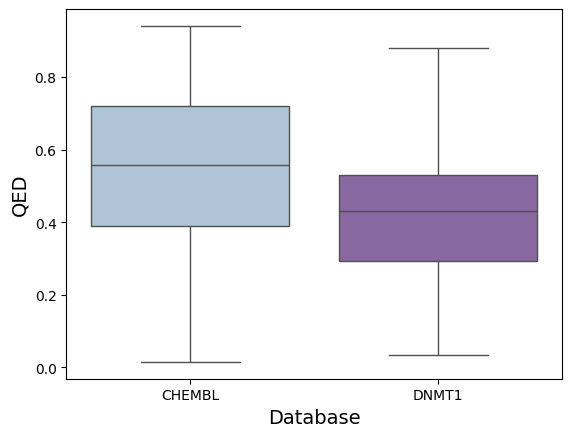

In [ ]:
#Plot boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="QED", data=DATA, palette="BuPu")
#Axis titles
plt.xlabel('Database', size=14)
plt.ylabel('QED', size=14)

## 5.2 Synthetic Accessibility Score

The SAscore assigns a number between 1 (easy to synthesize) and 10 (hard to synthesize) to a compound to estimate its synthetic accessibility. It is based on a combination of contributions from fragments and a penalization for its complexity. The cut-off point is a SAscore less or equal to 6. <br>
Reference: https://doi.org/10.1186/1758-2946-1-8

In [ ]:
#Import modules
import os
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

,ID,SMILES,DATABASE_NAME,Molecule,QED,SA
0,CHEMBL2,COc1cc2[nH]c(N3CCN(C(=O)c4ccco4)CC3)nc(=N)c2cc1OC,CHEMBL,,0.708798,2.665971
1,CHEMBL3,CN1CCCC1c1cccnc1,CHEMBL,,0.626152,2.499926
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,CHEMBL,,0.874740,3.097642

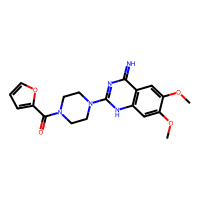
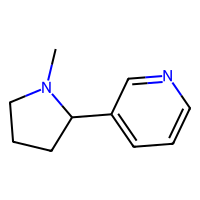
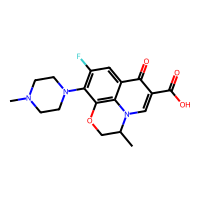

In [ ]:
#Calculate SAscore
SAlist = []

for mol in DATA['Molecule']:
    if mol is not None and isinstance(mol, Chem.Mol):
        SA = sascorer.calculateScore(mol)
    else:
        SA = None
    SAlist.append(SA)

DATA['SA']=SAlist
DATA.head(3)

<ipython-input-159-4934570a4d5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="DATABASE_NAME", y="SA", data=DATA, palette="Blues")


Text(0, 0.5, 'SAscore')

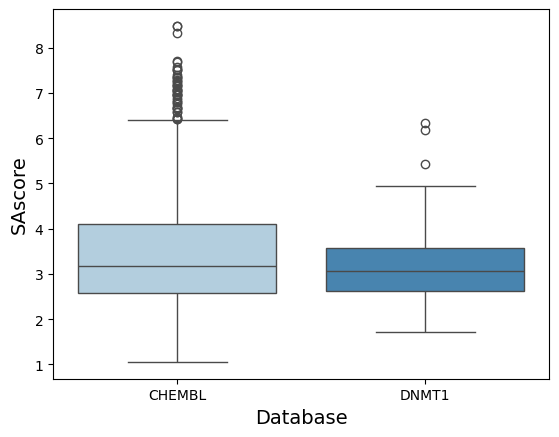

In [ ]:
#Plot boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="SA", data=DATA, palette="Blues")
#Axis titles
plt.xlabel('Database', size=14)
plt.ylabel('SAscore', size=14)

In [ ]:
#Delete Mol type molecule and save file in .csv format
DATA.drop("Molecule", axis=1, inplace=True)
DATA.to_csv("DATA.csv", index=False)

---
#For more information:

* [*Practical chemoinformatics*](http://practicalcheminformatics.blogspot.com/)

* [*Practical chemoinformatics - EDA*](http://practicalcheminformatics.blogspot.com/2021/10/exploratory-data-analysis-with.html)


* [*Python guides*](https://www.statology.org/python-guides/)

* [Representaciones gráficas en python](http://research.iac.es/sieinvens/python-course/matplotlib.html)

* [*Violinplots*](https://datagy.io/seaborn-violinplot/)

* [*Progress on open chemoinformatic tools for expanding and exploring the chemical space*](https://link.springer.com/article/10.1007/s10822-021-00399-1)

* [Bases de datos desde python](https://www.tutorialesprogramacionya.com/pythonya/detalleconcepto.php?punto=81&codigo=81&inicio=75) <br>

* [Quantitative Structure-Property Relationships (*QSPR*)](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/05%3A_5._Quantitative_Structure_Property_Relationships/5.05%3A_Python_Assignment)